**К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.**

*Изменения помечены капсом в комментариях к коду и в markdowns*

In [273]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [274]:
X, y = load_iris(return_X_y=True)
# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

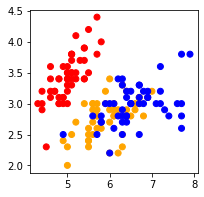

In [276]:
cmap = ListedColormap(['red', 'orange', 'blue'])
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [277]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

In [278]:
def get_graph(X_train, y_train, k, model):
    cmap_light = ListedColormap(['#FFAAAA', '#ffe1aa','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = model(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [279]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

**ИЗМЕНЕНИЯ**: рассчитываем вес как константа в степени расстояния

In [280]:
def knn_weighed_dist(x_train, y_train, x_test, k, q=0.5):
#ИЗМЕНЕНИЯ
    #введём константу q, которая лежит в диапазоне от 0 до 1 (для расчета веса)
    #q = 0.5 (в аргументах)
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
#ИЗМЕНЕНИЯ  #расчёт веса как возведение константы q в степень distance
            #чем больше расстояние, тем меньше вес (т.к. q<1)
            weight = q**distance
            
#ИЗМЕНЕНИЯ  # Записываем в список значение расстояния,ответа на объекте обучающей выборки и веса
            test_distances.append((distance, y_train[i], weight))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
#ИЗМЕНЕНИЯ # Сортируем список по расстоянию и среди первых k элементов
           #подсчитаем частоту появления разных классов с учетом веса
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1*d[2]  #Домножаем на вес, чтобы учесть важность вклада

        # Записываем в список ответов самый важный класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [281]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

С весами метрики лучше не стали, либо такие же, либо даже проигрывают:

In [282]:
for i in range (1,11):
    k = i

    y_pred = knn(X_train, y_train, X_test, k)
    y_pred_w = knn_weighed_dist(X_train, y_train, X_test, k)

    print(f'Точность классического алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
    print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_w, y_test):.3f}')
    print()

Точность классического алгоритма при k = 1: 0.700
Точность алгоритма с весами при k = 1: 0.700

Точность классического алгоритма при k = 2: 0.733
Точность алгоритма с весами при k = 2: 0.700

Точность классического алгоритма при k = 3: 0.733
Точность алгоритма с весами при k = 3: 0.733

Точность классического алгоритма при k = 4: 0.700
Точность алгоритма с весами при k = 4: 0.700

Точность классического алгоритма при k = 5: 0.733
Точность алгоритма с весами при k = 5: 0.733

Точность классического алгоритма при k = 6: 0.700
Точность алгоритма с весами при k = 6: 0.700

Точность классического алгоритма при k = 7: 0.733
Точность алгоритма с весами при k = 7: 0.733

Точность классического алгоритма при k = 8: 0.767
Точность алгоритма с весами при k = 8: 0.733

Точность классического алгоритма при k = 9: 0.733
Точность алгоритма с весами при k = 9: 0.733

Точность классического алгоритма при k = 10: 0.767
Точность алгоритма с весами при k = 10: 0.767



**ИЗМЕНЕНИЯ:** попробуем рассчитать веса как константу в степени порядкового номера

In [283]:
def knn_weighed_order(x_train, y_train, x_test, k, q=0.5):
#ИЗМЕНЕНИЯ
    #введём константу q, которая лежит в диапазоне от 0 до 1 (для расчета веса) в аргументах

    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            #расчёт веса как возведение константы q в степень distance
            
            # Записываем в список значение расстояния,ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        test_distances = sorted(test_distances)[0:k]
#ИЗМЕНЕНИЯ # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов с учетом веса
        for i in range(len(test_distances)):
            classes[test_distances[i][1]] += q**(i+1)  #Добавялем вес, чтобы учесть важность вклада

        # Записываем в список ответов наиболее важный класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

И сразу проверим, на каком q показатели модели с весами будут лучше показателей обычной модели

In [284]:
q = np.linspace(0.1,1,10)
for i in q:
    for k in range(1,11):
 
        y_pred = knn(X_train, y_train, X_test, k)
        y_pred_w = knn_weighed_order(X_train, y_train, X_test, k, q=i)
        if accuracy(y_pred, y_test)<accuracy(y_pred_w, y_test):
            print('q=',i)
            print(f'Точность классического алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
            print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_w, y_test):.3f}')


q= 0.8
Точность классического алгоритма при k = 6: 0.700
Точность алгоритма с весами при k = 6: 0.733
q= 0.9
Точность классического алгоритма при k = 6: 0.700
Точность алгоритма с весами при k = 6: 0.733


In [285]:
k=6
q=0.8
y_pred = knn(X_train, y_train, X_test, k)
y_pred_w = knn_weighed_order(X_train, y_train, X_test, k,q=q)

print(f'Точность классического алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_w, y_test):.3f}')

Точность классического алгоритма при k = 6: 0.700
Точность алгоритма с весами при k = 6: 0.733


С весами при k=6 метрика конечно лучше, но похоже на переобучение

(2352, 2)


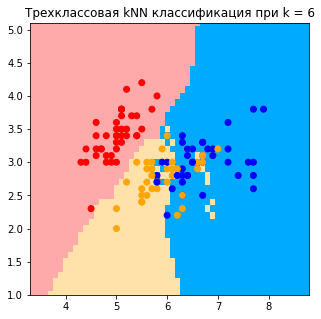

(2352, 2)


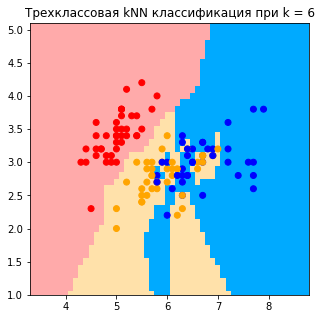

In [286]:
get_graph(X_train, y_train, k, knn)
get_graph(X_train, y_train, k, knn_weighed_order)

In [287]:
k=3
q=0.8
y_pred = knn(X_train, y_train, X_test, k)
y_pred_w = knn_weighed_order(X_train, y_train, X_test, k,q=q)

print(f'Точность классического алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма с весами при k = {k}: {accuracy(y_pred_w, y_test):.3f}')

Точность классического алгоритма при k = 3: 0.733
Точность алгоритма с весами при k = 3: 0.733


(2352, 2)


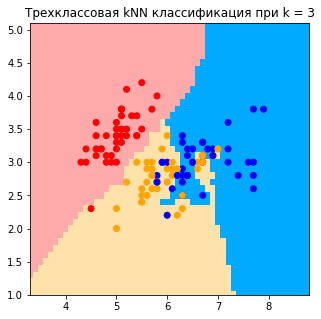

(2352, 2)


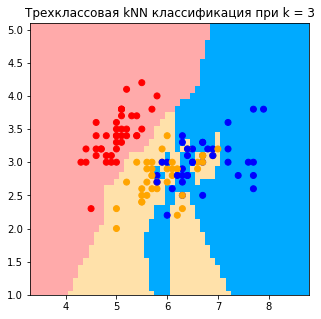

In [288]:
get_graph(X_train, y_train, k, knn)
get_graph(X_train, y_train, k, knn_weighed_order)

**Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.**

In [289]:
def visualize(centroids, clusters):
    colors = ['r', 'b', 'orange', 'y','g']
    
    plt.figure(figsize=(5,5))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [290]:
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(n_samples=100, random_state=1)

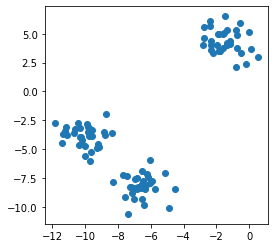

In [291]:
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1]);

**ИЗМЕНЕНИЯ**

In [292]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
#ИЗМЕНЕНИЯ #В начале каждой итерации будем обнулять список кластеров, 
           #иначе там потом оказывается в k раз объектов больше, чем должно быть
        clusters = {i: [] for i in range(k)}
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

In [293]:
#ИЗМЕНЕНИЯ
#Функция для подсчета внутрикластерного расстояния
def cluster_cohesion(centroids, clusters):
    metric = 0 #в начале метрика равна нулю
    
    #перебираем все центроиды
    for i in range (len(centroids)):
        #перебираем элементы, относящиеся к текущей центроиде
        for el in range(len(clusters[i])):
            #рассчитываем разницу расстояний между центроидой и элементом, прибавляем к метрике
            metric += np.sum(el - centroids[i])

    return metric

In [294]:
metrics = [[],[]]
max_iterations = 7
min_distance = 1e-4

for k in range(1,11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    metric = cluster_cohesion(centroids, clusters)
    metrics[0].append(k)
    metrics[1].append(metric)

При любом количестве итераций видна та самая Elbow Point на отметке 3, после которой метрика падает не так сильно. Значит можем сделать вывод, что в задаче вероятнее всего 3 кластера

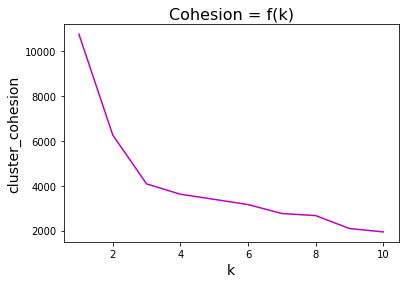

In [295]:
plt.plot(metrics[0], metrics[1], 'm')
plt.xlabel('k', fontsize=14)
plt.ylabel('cluster_cohesion', fontsize=14)
plt.title('Cohesion = f(k)',fontsize=16)
plt.show()